<a href="https://colab.research.google.com/github/janlukasschroeder/nlp-cheat-sheet-python/blob/master/Tokenizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenizers
---

A tokenizer splits a text into tokens. A text can be a single word, sentence or an entire document. A token represents a logical piece of the text, such as 
- single word (`cat`, `U.K.`), 
- a part of a word (`sail`, `ing`, `-chief`), 
- punctuations (`"`, `!`)
- special tokens added by the tokenizer to the text corpus (`[SEP]` = sentence separator)

Different tokenizers produce different tokens for the same input sentence.

**Sentence**
`Larry lived in N.Y.?`

**Tokens (A)**
`['Larry', 'lived', 'in', 'N.Y.', '?']`

**Tokens (B)**
`['Larry', 'lived', 'in', 'N', '.', 'Y', '.', '?']`

A tokenizer encodes text into tokens, and can also decode tokens into the original text. Decoding is a loss-less transformation, i.e. no information is lost during the process. Encoding can be a lossy transformation in same cases where decoding tokens into the original text isn't required. 

## Types of Tokenizers

Two types of tokenizers exist:
- Deterministic (rule-based), e.g. using regular expressions. Example: splitting a text on every full stop `.`.
- Stochastic (trained/learned models), e.g. transformer-based tokenizer such as BERT tokenizer. Example: understand the sentence structure and meaning, and determine best way to split the sentence considering its structure and meaning.

Deterministic tokenizers only use preset rules. Such rules have to be manually updated by the engineer to process a new, different text corpus in case the old rules don't cover all tokenization cases.

Stochastic tokenizers can be fine-tuned and trained on a new text corpus to identify new strategies to determine how to split text into tokens, without providing specific rules.

There are different classes of stochastic tokenizers. Examples include:
- **Byte-Pair Encoding** (BPE), used by GPT, GPT-2, RoBERTa, BART, and DeBERTa.
- **WordPiece**, used by BERT, such as DistilBERT, MobileBERT, Funnel Transformers, and MPNET.
- **Unigram**, used by AlBERT, T5, mBART, Big Bird, and XLNet.
- **SentencePiece** 

# Tokenization Process

---

Before text or HTML is tokenized, it has to be cleaned and normalized. This includes

- Removing HTML comments, `<!--` and `-->`
- Removing custom XML entities, such as XBRL tags `<ix:...>`
- Normalize accents, such as `Héllò` to `Hello`
- [Normalize Unicode entities](http://www.unicode.org/reports/tr15/), convert unicide `0x00A9` (=`©`) to numerical entity `&#169;`
- Convert named char entities (`\&nbsp;`) and hexdeciaml entities (`\&#xA0;`) to numerical counterparts (`\&#160;`)

Depending on the process following the tokenization, i.e. what the tokens should be used for, the following is applied:
- Lowercasing all words, e.g. transforming `Legal Proceedings` to `legal proceedings` 
- Convering all non-alphanumeric characters, e.g. `\nHi Ju-San!\n` to `Hi JuSan` (all non-alphanumeric characters are replace with an empty string)

## Example Process

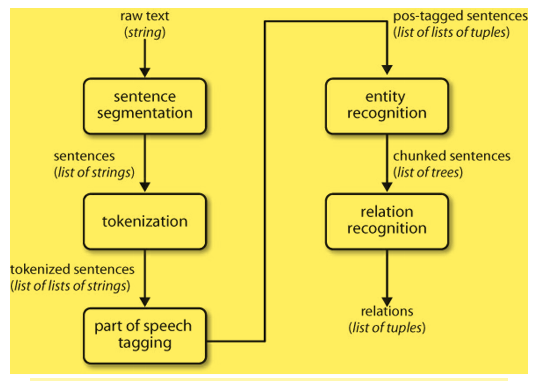

Credits: Natrual Language Processing with Python book

# Tokenizers in Python
---

Plenty of tokenizers exists today, ranging from general-purpose tokenizers such as spacy's rule-based engine, all the way to model-specific tokenizers that should only be used in conjuction with its transformer model, such as GPT-2. 

The following is a list of tokenizers and how they are implemented/used in Python.

## Rule-Based Tokenizers
- spacy
- [Moses](http://www2.statmt.org/moses/?n=Development.GetStarted)
- [segtok](https://pypi.org/project/segtok/) - sentence segmentation and word tokenization
- [FTFY](https://pypi.org/project/ftfy/)

## Neural-Network Based Tokenizers
- [BERT](https://huggingface.co/docs/transformers/v4.25.1/en/model_doc/bert#transformers.BertTokenizer)
- GPT-2
- T5
- [SentencePiece](https://github.com/google/sentencepiece)
- [Transformer XL](https://huggingface.co/docs/transformers/model_doc/transfo-xl#transformers.TransfoXLTokenizer) uses space and punctuation tokenization
- [XLNet](https://huggingface.co/docs/transformers/v4.25.1/en/model_doc/xlnet#transformers.XLNetTokenizer)



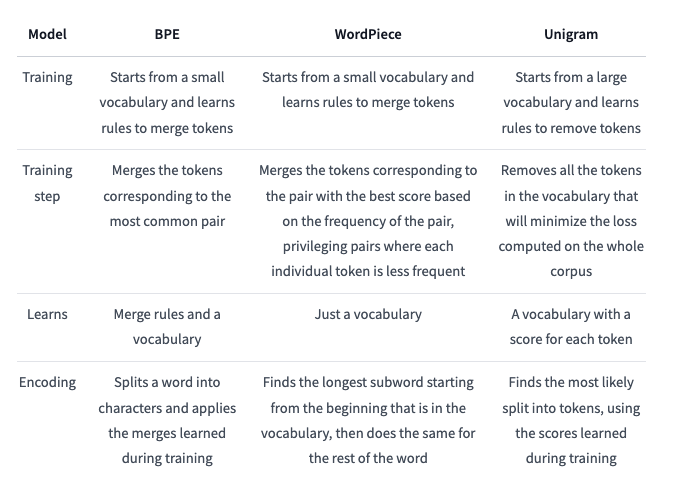

[Credits](https://huggingface.co/course/chapter6/4?fw=pt)

In [ ]:
sentence = "Apple is looking at buying U.K. startup for $1 billion."

## spacy Tokenizer

In [ ]:
pip install spacy

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(sentence)
tokens = [token.text for token in doc]
tokens

['Apple',
 'is',
 'looking',
 'at',
 'buying',
 'U.K.',
 'startup',
 'for',
 '$',
 '1',
 'billion',
 '.']

# BERT Tokenizer


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# tokens = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(sentence)
# tokens = [token[0] for token in tokens]

tokens = tokenizer.backend_tokenizer.encode(sentence)
tokens.tokens

['[CLS]',
 'apple',
 'is',
 'looking',
 'at',
 'buying',
 'u',
 '.',
 'k',
 '.',
 'startup',
 'for',
 '$',
 '1',
 'billion',
 '.',
 '[SEP]']

# GPT-2 Tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
# tokens = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(sentence)
# tokens = [token[0] for token in tokens]

tokens = tokenizer.backend_tokenizer.encode(sentence)
tokens.tokens

['Apple',
 'Ġis',
 'Ġlooking',
 'Ġat',
 'Ġbuying',
 'ĠU',
 '.',
 'K',
 '.',
 'Ġstartup',
 'Ġfor',
 'Ġ$',
 '1',
 'Ġbillion',
 '.']

# T5 Tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("t5-small")
# pre_tokens = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(sentence)
# pre_tokens = [token[0] for token in pre_tokens]

tokens = tokenizer.backend_tokenizer.encode(sentence)
tokens.tokens

['▁Apple',
 '▁is',
 '▁looking',
 '▁at',
 '▁buying',
 '▁U',
 '.',
 'K',
 '.',
 '▁startup',
 '▁for',
 '▁$1',
 '▁billion',
 '.',
 '</s>']

# Training a Tokenizer

In [ ]:
from datasets import load_dataset

# This can take a few minutes to load, so grab a coffee or tea while you wait!
raw_datasets = load_dataset("code_search_net", "python")

In [ ]:
from transformers import AutoTokenizer

old_tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [ ]:
def get_training_corpus():
    dataset = raw_datasets["train"]
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx : start_idx + 1000]
        yield samples["whole_func_string"]

training_corpus = get_training_corpus()

In [ ]:
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 52000)

In [ ]:
example = """class LinearLayer():
    def __init__(self, input_size, output_size):
        self.weight = torch.randn(input_size, output_size)
        self.bias = torch.zeros(output_size)

    def __call__(self, x):
        return x @ self.weights + self.bias
    """
    
tokenizer.tokenize(example)

In [ ]:
# save tokenizer
tokenizer.save_pretrained("code-search-net-tokenizer")